In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta,date
from dateutil.parser import parse



In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\My Python codes\ebola_2014_2016_clean.csv", usecols = ["Country", "Date", "No. of suspected cases", "No. of confirmed cases", "No. of confirmed deaths"], parse_dates = ["Date"], index_col = ["Date"])
df.head(12)

,Country,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths
Date,,,,
2014-08-29,Guinea,25.0,482.0,287.0
2014-08-29,Nigeria,3.0,15.0,6.0
2014-08-29,Sierra Leone,54.0,935.0,380.0
2014-08-29,Liberia,382.0,322.0,225.0
2014-09-05,Sierra Leone,78.0,1146.0,443.0
2014-09-05,Nigeria,3.0,18.0,7.0
2014-09-05,Liberia,369.0,614.0,431.0
2014-09-05,Guinea,56.0,604.0,362.0
2014-09-05,Senegal,NaN,1.0,0.0


In [4]:
#First we check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2485 entries, 2014-08-29 to 2016-03-23
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2485 non-null   object 
 1   No. of suspected cases   2366 non-null   float64
 2   No. of confirmed cases   2484 non-null   float64
 3   No. of confirmed deaths  1648 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.1+ KB


In [5]:
#Fill NaaN cells with 0
df.fillna(0, inplace = True)
df

,Country,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths
Date,,,,
2014-08-29,Guinea,25.0,482.0,287.0
2014-08-29,Nigeria,3.0,15.0,6.0
2014-08-29,Sierra Leone,54.0,935.0,380.0
2014-08-29,Liberia,382.0,322.0,225.0
2014-09-05,Sierra Leone,78.0,1146.0,443.0
...,...,...,...,...
2016-03-23,Liberia,5636.0,3151.0,0.0
2016-03-23,Italy,0.0,1.0,0.0
2016-03-23,Liberia,0.0,2.0,1.0


In [6]:
df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [7]:
#Total Number of cases in each country
df_countries = df.groupby("Country").sum()
df_countries

,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths
Country,,,
Guinea,4293.0,749622.0,461211.0
Italy,0.0,141.0,0.0
Liberia,1212033.0,768738.0,26937.0
Mali,1.0,1658.0,21.0
Nigeria,10.0,4840.0,1784.0
Senegal,4.0,254.0,0.0
Sierra Leone,893756.0,2041871.0,797984.0
Spain,0.0,243.0,0.0
United Kingdom,0.0,221.0,0.0


In [8]:
#Now we find the total cases globally
df_total = pd.DataFrame(pd.to_numeric(df_countries.sum()),dtype=np.float64).transpose()
df_total

,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths
0,2110097.0,3568555.0,1288179.0


In [9]:
#Calculate the global mortality rate
df_total["Mortality Rate (per 100)"] = np.round(100*df_total["No. of confirmed deaths"]/df_total["No. of confirmed cases"],2)
df_total.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["No. of confirmed deaths","No. of confirmed cases", "No. of suspected cases"])

,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths,Mortality Rate (per 100)
0,2110097,3568555,1288179,36.10


In [10]:
#calculate the mortality rate for each affected country
df_countries["Mortality Rate (per 100)"] = np.round(100*df_countries["No. of confirmed deaths"]/df_countries["No. of confirmed cases"],2)
df_countries

,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths,Mortality Rate (per 100)
Country,,,,
Guinea,4293.0,749622.0,461211.0,61.53
Italy,0.0,141.0,0.0,0.00
Liberia,1212033.0,768738.0,26937.0,3.50
Mali,1.0,1658.0,21.0,1.27
Nigeria,10.0,4840.0,1784.0,36.86
Senegal,4.0,254.0,0.0,0.00
Sierra Leone,893756.0,2041871.0,797984.0,39.08
Spain,0.0,243.0,0.0,0.00
United Kingdom,0.0,221.0,0.0,0.00


In [11]:
df_countries.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["No. of confirmed deaths","No. of confirmed cases", "No. of suspected cases"])

,No. of suspected cases,No. of confirmed cases,No. of confirmed deaths,Mortality Rate (per 100)
Country,,,,
Guinea,4293,749622,461211,61.53
Italy,0,141,0,0.00
Liberia,1212033,768738,26937,3.50
Mali,1,1658,21,1.27
Nigeria,10,4840,1784,36.86
Senegal,4,254,0,0.00
Sierra Leone,893756,2041871,797984,39.08
Spain,0,243,0,0.00
United Kingdom,0,221,0,0.00


Text(0.5, 1.0, 'No. of confirmed cases')

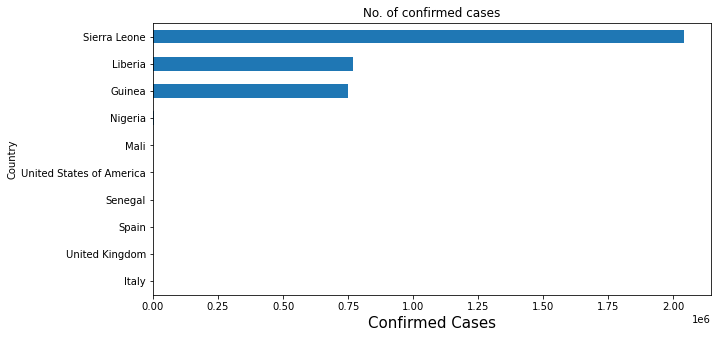

In [12]:
df_countries["No. of confirmed cases"].sort_values().plot(kind='barh', figsize = (10, 5), subplots = False)
plt.xlabel("Confirmed Cases",fontsize=15)
plt.title("No. of confirmed cases")

Text(0.5, 1.0, 'No. of confirmed deaths')

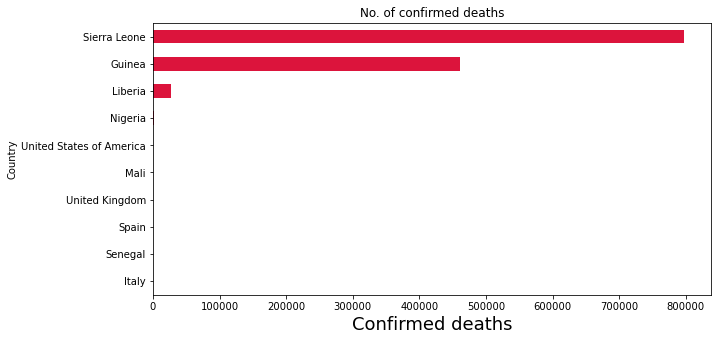

In [13]:
df_countries["No. of confirmed deaths"].sort_values().plot(kind='barh', figsize = (10, 5), color = 'crimson', subplots = False)
plt.xlabel("Confirmed deaths",fontsize=18)
plt.title("No. of confirmed deaths")

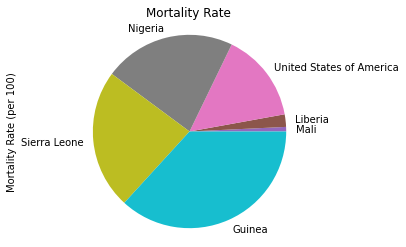

In [14]:
df_countries["Mortality Rate (per 100)"].sort_values().plot(kind='pie', subplots = False).axis('equal')
plt.title('Mortality Rate')
plt.show()

In [15]:
#extract a separate df for confirmed cases and confirmed deaths in each
df_spread = df[["No. of confirmed cases","No. of confirmed deaths"]].groupby("Date").sum()
df_spread

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-08-29,1754.0,898.0
2014-09-05,2383.0,1243.0
2014-09-08,2552.0,1376.0
2014-09-12,2639.0,1386.0
2014-09-16,3017.0,1513.0
...,...,...
2015-12-17,15249.0,5683.0
2015-12-22,15249.0,5683.0
2015-12-23,15249.0,5683.0


Text(0.5, 1.0, 'Spread of ebola over time')

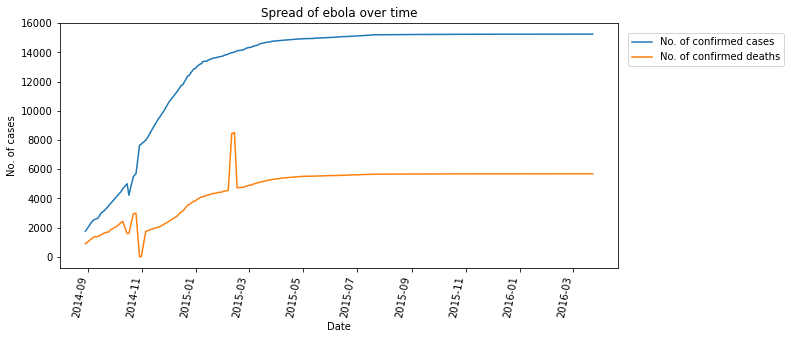

In [27]:
df_spread.plot(kind = 'line', figsize = (10, 5), rot = 80)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
plt.ylabel("No. of cases")
plt.title('Spread of ebola over time')

In [25]:
#Now we sample a tenth of the data
sample_10 = df_spread.sample(frac = .1, random_state=np.random.randint(10)).sort_index()
sample_10

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-10-29,7632.0,9.0
2014-12-22,12351.0,3521.0
2014-12-23,12418.0,3568.0
2015-01-05,13184.0,4045.0
2015-01-12,13405.0,4206.0
2015-01-26,13691.0,4411.0
2015-01-29,13719.0,4428.0
2015-02-03,13843.0,4515.0
2015-02-17,14121.0,4733.0


Text(0.5, 1.0, 'Sampled time frame')

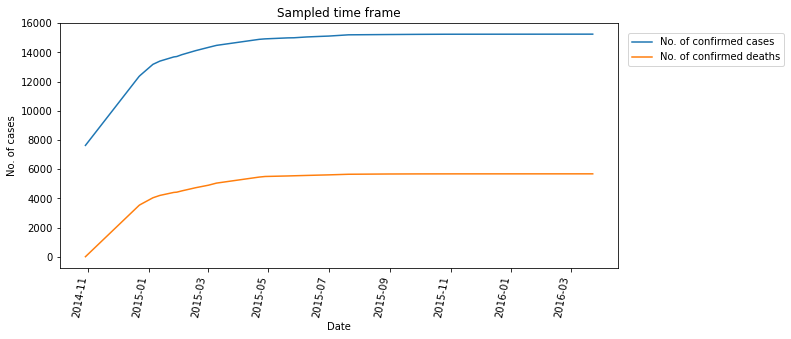

In [28]:
sample_10.plot(kind = 'line', figsize = (10, 5), rot = 80)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
plt.ylabel("No. of cases")
plt.title('Sampled time frame')